# Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('driving_behaviour_data/train_motion_data.csv')
test_data = pd.read_csv('driving_behaviour_data/test_motion_data.csv')

#print(train_data.head())
#print(test_data.head())

# Analysing the data and preprocessing

In [2]:
#check for any null (missing) values
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()
missing_values_test,missing_values_train

(AccX         0
 AccY         0
 AccZ         0
 GyroX        0
 GyroY        0
 GyroZ        0
 Class        0
 Timestamp    0
 dtype: int64,
 AccX         0
 AccY         0
 AccZ         0
 GyroX        0
 GyroY        0
 GyroZ        0
 Class        0
 Timestamp    0
 dtype: int64)

In [3]:
#add colums for magnitudes of acceleration and gyroscope to the data
for df in [train_data, test_data]:
  df['AccMagnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
  df['GyroMagnitude'] = np.sqrt(df['GyroX']**2 + df['GyroY']**2 + df['GyroZ']**2)

#print(train_data.head())
#print(test_data.head())

In [4]:
#separate the data for aggressive, normal, and slow labels
train_data_aggressive = train_data[train_data['Class'] == 'AGGRESSIVE']
train_data_normal = train_data[train_data['Class'] == 'NORMAL']
train_data_slow = train_data[train_data['Class'] == 'SLOW']

test_data_aggressive = test_data[test_data['Class'] == 'AGGRESSIVE']
test_data_normal = test_data[test_data['Class'] == 'NORMAL']
test_data_slow = test_data[test_data['Class'] == 'SLOW']

# Plotting acceleration and gyro

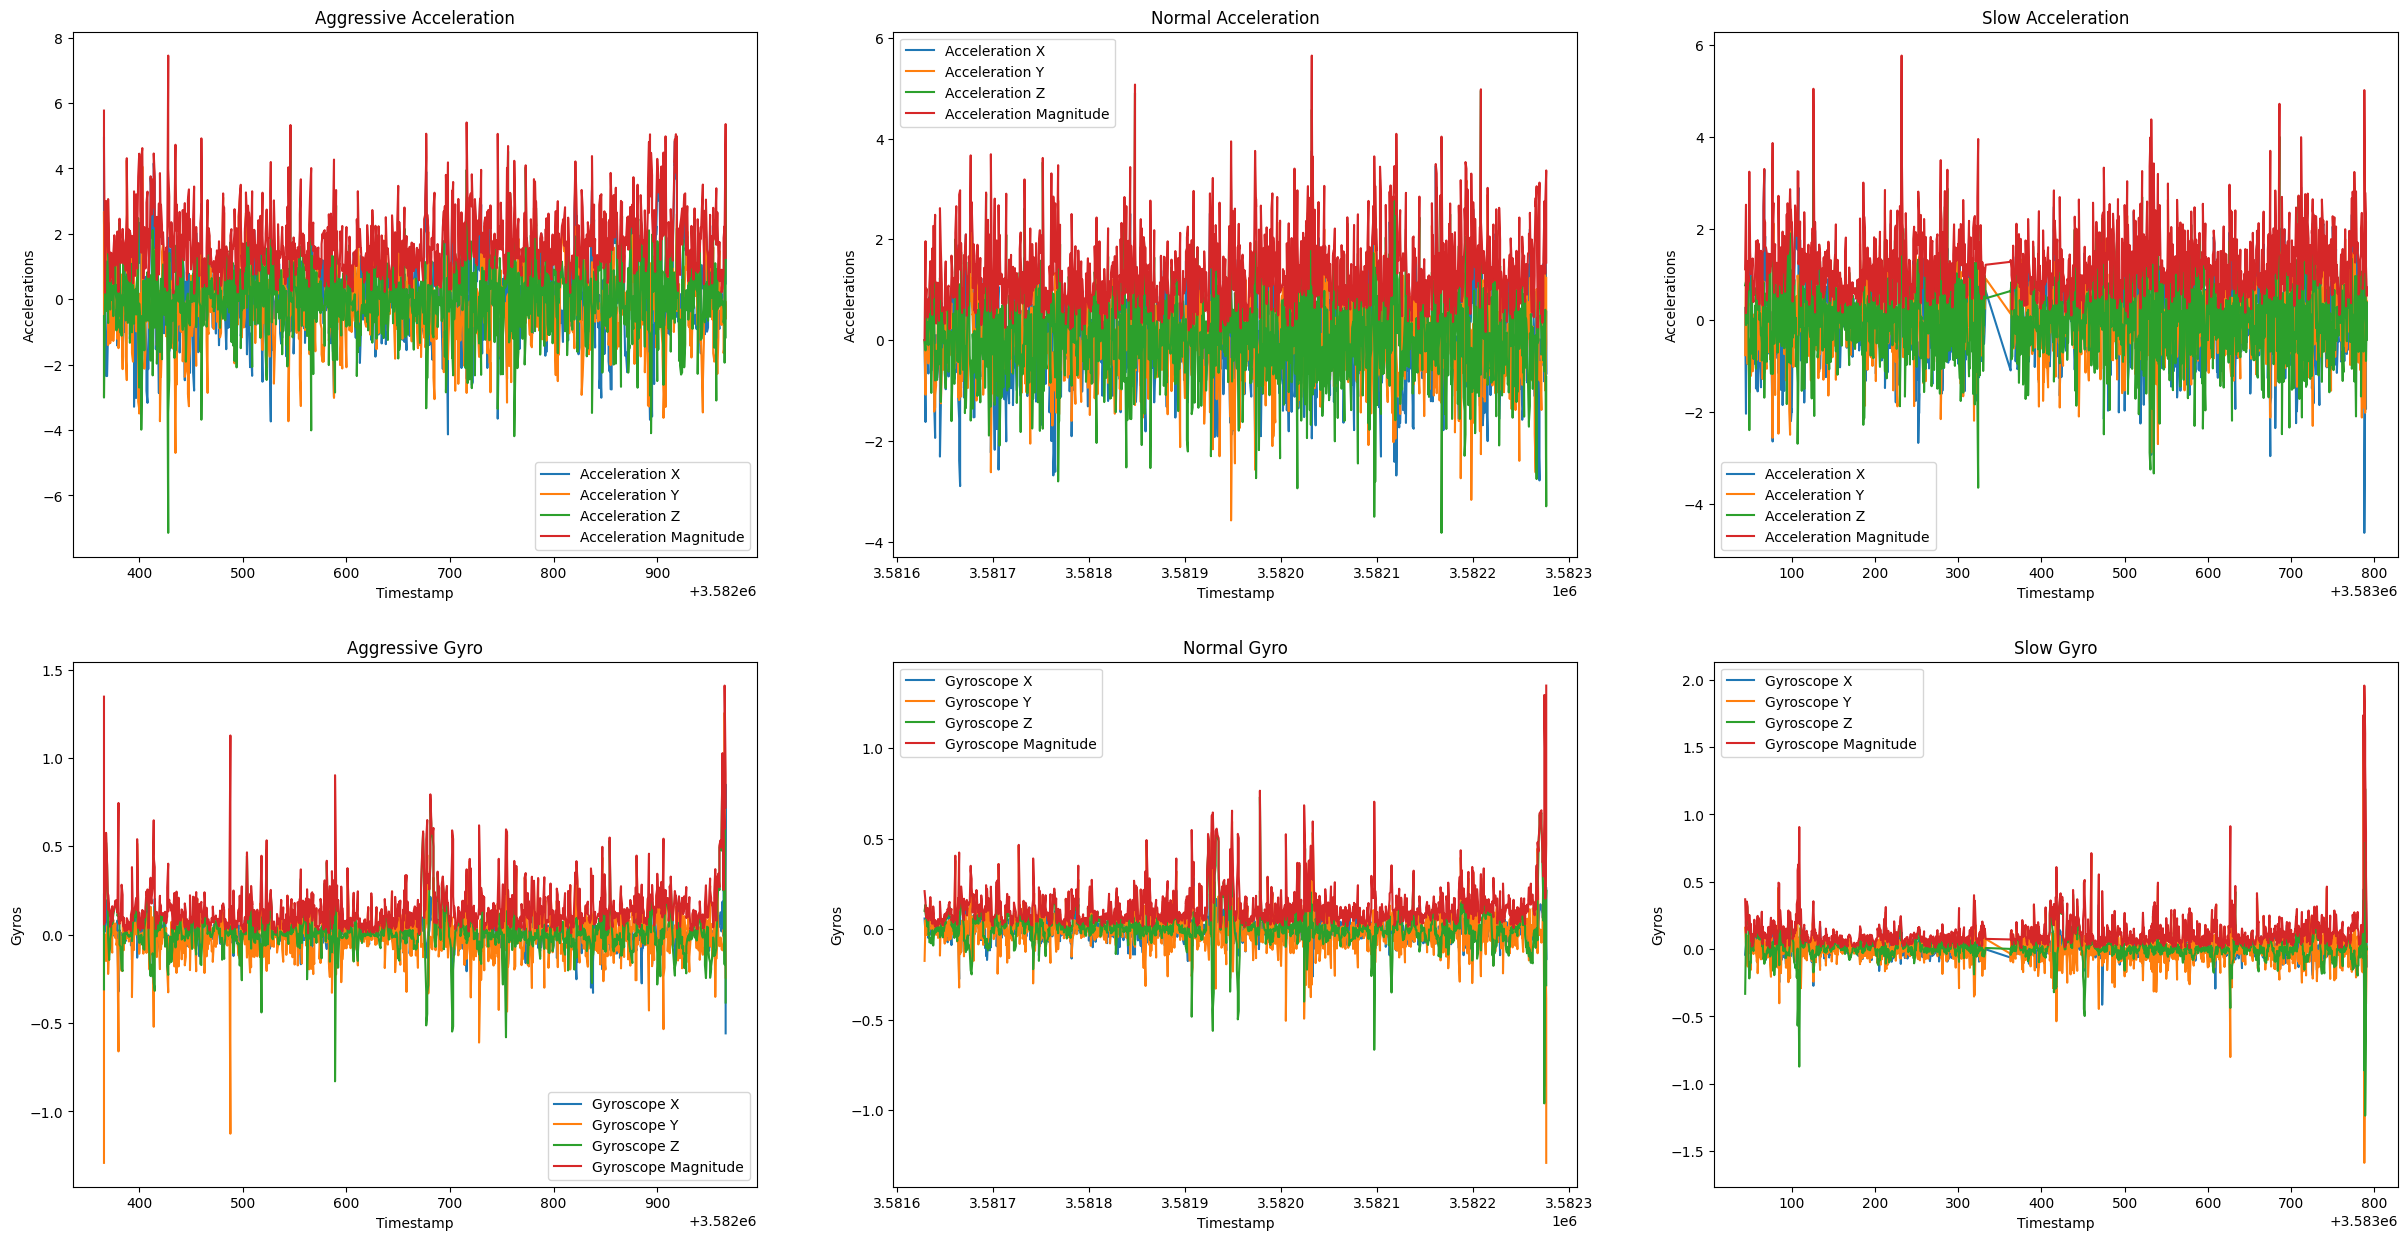

In [5]:
figure, axis = plt.subplots(2,3, figsize=(30,15))

#aggressive acceleration
axis[0,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['AccX'] , label = 'Acceleration X')
axis[0,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['AccY'] , label = 'Acceleration Y')
axis[0,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['AccZ'] , label = 'Acceleration Z')
axis[0,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['AccMagnitude'] , label = 'Acceleration Magnitude')
axis[0,0].legend()
axis[0,0].set_title('Aggressive Acceleration')
axis[0,0].set_xlabel('Timestamp')
axis[0,0].set_ylabel("Accelerations")

#normal acceleration
axis[0,1].plot(train_data_normal['Timestamp'] , train_data_normal['AccX'] , label = 'Acceleration X')
axis[0,1].plot(train_data_normal['Timestamp'] , train_data_normal['AccY'] , label = 'Acceleration Y')
axis[0,1].plot(train_data_normal['Timestamp'] , train_data_normal['AccZ'] , label = 'Acceleration Z')
axis[0,1].plot(train_data_normal['Timestamp'] , train_data_normal['AccMagnitude'] , label = 'Acceleration Magnitude')
axis[0,1].legend()
axis[0,1].set_title('Normal Acceleration')
axis[0,1].set_xlabel('Timestamp')
axis[0,1].set_ylabel("Accelerations")

#slow acceleration
axis[0,2].plot(train_data_slow['Timestamp'] , train_data_slow['AccX'] , label = 'Acceleration X')
axis[0,2].plot(train_data_slow['Timestamp'] , train_data_slow['AccY'] , label = 'Acceleration Y')
axis[0,2].plot(train_data_slow['Timestamp'] , train_data_slow['AccZ'] , label = 'Acceleration Z')
axis[0,2].plot(train_data_slow['Timestamp'] , train_data_slow['AccMagnitude'] , label = 'Acceleration Magnitude')
axis[0,2].legend()
axis[0,2].set_title('Slow Acceleration')
axis[0,2].set_xlabel('Timestamp')
axis[0,2].set_ylabel("Accelerations")

#aggressive gyroscope
axis[1,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['GyroX'] , label = 'Gyroscope X')
axis[1,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['GyroY'] , label = 'Gyroscope Y')
axis[1,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['GyroZ'] , label = 'Gyroscope Z')
axis[1,0].plot(train_data_aggressive['Timestamp'] , train_data_aggressive['GyroMagnitude'] , label = 'Gyroscope Magnitude')
axis[1,0].legend()
axis[1,0].set_title('Aggressive Gyro')
axis[1,0].set_xlabel('Timestamp')
axis[1,0].set_ylabel("Gyros")

#normal gyroscope
axis[1,1].plot(train_data_normal['Timestamp'] , train_data_normal['GyroX'] , label = 'Gyroscope X')
axis[1,1].plot(train_data_normal['Timestamp'] , train_data_normal['GyroY'] , label = 'Gyroscope Y')
axis[1,1].plot(train_data_normal['Timestamp'] , train_data_normal['GyroZ'] , label = 'Gyroscope Z')
axis[1,1].plot(train_data_normal['Timestamp'] , train_data_normal['GyroMagnitude'] , label = 'Gyroscope Magnitude')
axis[1,1].legend()
axis[1,1].set_title('Normal Gyro')
axis[1,1].set_xlabel('Timestamp')
axis[1,1].set_ylabel("Gyros")

#slow gyroscope
axis[1,2].plot(train_data_slow['Timestamp'] , train_data_slow['GyroX'] , label = 'Gyroscope X')
axis[1,2].plot(train_data_slow['Timestamp'] , train_data_slow['GyroY'] , label = 'Gyroscope Y')
axis[1,2].plot(train_data_slow['Timestamp'] , train_data_slow['GyroZ'] , label = 'Gyroscope Z')
axis[1,2].plot(train_data_slow['Timestamp'] , train_data_slow['GyroMagnitude'] , label = 'Gyroscope Magnitude')
axis[1,2].legend()
axis[1,2].set_title('Slow Gyro')
axis[1,2].set_xlabel('Timestamp')
axis[1,2].set_ylabel("Gyros")

plt.show()

# KNN classification

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
#split the features and labels

x_train = train_data.drop(columns=['Class', 'Timestamp'])
y_train = train_data['Class']

x_test = test_data.drop(columns=['Class', 'Timestamp'])
y_test = list(test_data['Class'])

In [8]:
knn = KNeighborsClassifier() #defaults to k=5
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
y_test_predictions = knn.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_test_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predictions))


Classification Report:
              precision    recall  f1-score   support

  AGGRESSIVE       0.34      0.45      0.39       814
      NORMAL       0.32      0.33      0.33       997
        SLOW       0.45      0.35      0.39      1273

    accuracy                           0.37      3084
   macro avg       0.37      0.38      0.37      3084
weighted avg       0.38      0.37      0.37      3084

Confusion Matrix:
[[368 237 209]
 [335 329 333]
 [374 459 440]]


It seems that KNN classification (with k=5) has a fairly low accuracy of 37%. In addition, the confusion matrix indicates that there may be a lot of overlap between classes, meaning acceleration and gyroscopic information are not distinct enough between each type of driver.

To improve upon this model, I could try to find better values for k, or calculate new columns for the data. For example, I've calculated magnitudes of acceleration and gyro, but it may be possible to calculate derivatives/change, frequency of this change, and the largest local/relative magnitudes of change.
